### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №2

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:   Леонова Алина
##### Группа:    НФИбд-02-17

### Москва 2020
***

### Вариант №10


***
#### Постановка задачи:
+ Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI.
+ Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями.
+ Определите признак, содержащий метку класса. Определите числовой признак, имеющий максимальную дисперсию.
+ При помощи класса SelectKBest библиотеки scikit-learn найдите два признака, имеющих наиболее выраженную взаимосвязь с признаком, имеющим максимальную дисперсию.
+ Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами.
+ Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр n_components), для которой доля объясняемой дисперсии будет не менее 99%.
+ Пользуясь методом главных компонент, снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде точек на плоскости, отображая точки различных классов разными цветами.
***

In [1]:
import numpy as np
import pandas as pd

url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# read data into pandas data frame
data = pd.read_csv( url, header=None, prefix="V" )

print('\nЧисло записей = %d' % (data.shape[0]))
print('Число признаков = %d' % (data.shape[1]))
print( "\n*** Типы:\n", data.dtypes)

data 


Число записей = 205
Число признаков = 26

*** Типы:
 V0       int64
V1      object
V2      object
V3      object
V4      object
V5      object
V6      object
V7      object
V8      object
V9     float64
V10    float64
V11    float64
V12    float64
V13      int64
V14     object
V15     object
V16      int64
V17     object
V18     object
V19     object
V20    float64
V21     object
V22     object
V23      int64
V24      int64
V25     object
dtype: object


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


**Избавляюсь от категориальных признаков, которые видно выше**

In [2]:
from pandas import DataFrame
df = DataFrame(data)

df = df.drop(['V2','V3','V4','V5','V6','V7','V8','V17'],axis=1)
df

,V0,V1,V9,V10,V11,V12,V13,V14,V15,V16,V18,V19,V20,V21,V22,V23,V24,V25
0,3,?,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,ohc,four,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,ohc,four,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,ohcv,six,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,ohc,six,145,3.01,3.40,23.0,106,4800,26,27,22470


**Избавляюсь от оставшихся категориальных признаков**

In [3]:
df = df.drop(['V14','V15'],axis=1)
df

,V0,V1,V9,V10,V11,V12,V13,V16,V18,V19,V20,V21,V22,V23,V24,V25
0,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


**Избавляюсь от '?' и смотрю в каких признаках есть отсутсвие значений**

In [4]:
df = df.replace('?',np.NaN)

print('Число записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))

print('Число отсутствующих значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

df

Число записей = 205
Число признаков = 16
Число отсутствующих значений:
	V0: 0
	V1: 41
	V9: 0
	V10: 0
	V11: 0
	V12: 0
	V13: 0
	V16: 0
	V18: 4
	V19: 4
	V20: 0
	V21: 2
	V22: 2
	V23: 0
	V24: 0
	V25: 4


,V0,V1,V9,V10,V11,V12,V13,V16,V18,V19,V20,V21,V22,V23,V24,V25
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


**В признаке V1 не хватает 1/5 от всех значений, как-то много, но стоит задача заменить все отсутствующие значения на медианные значения соответствующих столбцов**

In [5]:
dfn = df
v1 = dfn['V1']
v18 = dfn['V18']
v18 = dfn['V18']
v19 = dfn['V19']
v21 = dfn['V21']
v22 = dfn['V22']
v25 = dfn['V25']

dfn['V1'] = v1.fillna(v1.median())
dfn['V18'] = v18.fillna(v18.median())
dfn['V19'] = v19.fillna(v19.median())
dfn['V21'] = v21.fillna(v21.median())
dfn['V22'] = v22.fillna(v22.median())
dfn['V25'] = v25.fillna(v25.median())

print('Число отсутствующих значений:')
for col in dfn.columns:
    print('\t%s: %d' % (col,dfn[col].isna().sum()))

Число отсутствующих значений:
	V0: 0
	V1: 0
	V9: 0
	V10: 0
	V11: 0
	V12: 0
	V13: 0
	V16: 0
	V18: 0
	V19: 0
	V20: 0
	V21: 0
	V22: 0
	V23: 0
	V24: 0
	V25: 0


**Типы числовых признаков**

In [6]:
print(dfn.dtypes)
dfn

V0       int64
V1      object
V9     float64
V10    float64
V11    float64
V12    float64
V13      int64
V16      int64
V18     object
V19     object
V20    float64
V21     object
V22     object
V23      int64
V24      int64
V25     object
dtype: object


,V0,V1,V9,V10,V11,V12,V13,V16,V18,V19,V20,V21,V22,V23,V24,V25
0,3,115,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


**Некоторые признаки не отображаются числовыми,  в нескольких полях после целой части шли ".0", преобразую всё в числовые значения**

In [7]:
dfn=dfn.apply(pd.to_numeric, downcast='signed')

print("Сводка данных для всех числовых признаков")
dfn.dtypes

Сводка данных для всех числовых признаков


V0        int8
V1       int16
V9     float64
V10    float64
V11    float64
V12    float64
V13      int16
V16      int16
V18    float64
V19    float64
V20    float64
V21      int16
V22      int16
V23       int8
V24       int8
V25      int32
dtype: object

In [8]:
print("Все числовые признаки")
dfn

Все числовые признаки


,V0,V1,V9,V10,V11,V12,V13,V16,V18,V19,V20,V21,V22,V23,V24,V25
0,3,115,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


+ Определите признак, содержащий метку класса. Определите числовой признак, имеющий максимальную дисперсию.

In [9]:
data.nunique()

V0       6
V1      52
V2      22
V3       2
V4       2
V5       3
V6       5
V7       3
V8       2
V9      53
V10     75
V11     44
V12     49
V13    171
V14      7
V15      7
V16     44
V17      8
V18     39
V19     37
V20     32
V21     60
V22     24
V23     29
V24     30
V25    187
dtype: int64

In [10]:
dfn.nunique()

V0       6
V1      51
V9      53
V10     75
V11     44
V12     49
V13    171
V16     44
V18     38
V19     36
V20     32
V21     59
V22     23
V23     29
V24     30
V25    186
dtype: int64

**Метку класса содержит признак V0. Во первых, он содержит наименьшее число уникальных значений из числовых признаков, во вторых, я залезла в файл `import-85.names` и узнала, что это фактор риска автомобиля (значение +3 - рисковано, -3 - безопасно), который вроде является результатом обработки остальных признаков.**

In [11]:
var = np.var(dfn)
print(var)
print('\nМаксимальная дисперсия =', max(var))

V0     1.543224e+00
V1     1.006630e+03
V9     3.608490e+01
V10    1.514662e+02
V11    4.579451e+00
V12    5.941674e+00
V13    2.697854e+05
V16    1.725655e+03
V18    7.300594e-02
V19    9.788623e-02
V20    1.570014e+01
V21    1.554977e+03
V22    2.264531e+05
V23    4.259084e+01
V24    4.719177e+01
V25    6.177772e+07
dtype: float64

Максимальная дисперсия = 61777720.905556135


**Максимальную дисперсию имеет числовой признак V25.**

+ При помощи класса SelectKBest библиотеки scikit-learn найдите два признака, имеющих наиболее выраженную взаимосвязь с признаком, имеющим максимальную дисперсию.

In [12]:
# отбор признаков при помощи одномерных статистических тестов 
from sklearn.feature_selection import SelectKBest,chi2

print("\nНабор числовых данных:\n",dfn.head())

# входные переменные - все признаки, кроме V0 (метка класса) и V25 (мах дисп)
X = dfn.values[:,1:(len(dfn.T)-1)]

# выходная переменная - признак, ищеющий максимальную дисперсию
Y = dfn.values[:,len(dfn.T)-1]
    
# отбор признаков
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, Y)

# оценки признаков
print("\nОценки признаков:\n",fit.scores_)

cols = test.get_support(indices=True)
dfn_new = dfn.iloc[:,cols]
print("\nОтобранные признаки:\n",dfn_new.head())


Набор числовых данных:
    V0   V1    V9    V10   V11   V12   V13  V16   V18   V19   V20  V21   V22  \
0   3  115  88.6  168.8  64.1  48.8  2548  130  3.47  2.68   9.0  111  5000   
1   3  115  88.6  168.8  64.1  48.8  2548  130  3.47  2.68   9.0  111  5000   
2   1  115  94.5  171.2  65.5  52.4  2823  152  2.68  3.47   9.0  154  5000   
3   2  164  99.8  176.6  66.2  54.3  2337  109  3.19  3.40  10.0  102  5500   
4   2  164  99.4  176.6  66.4  54.3  2824  136  3.19  3.40   8.0  115  5500   

   V23  V24    V25  
0   21   27  13495  
1   21   27  16500  
2   19   26  16500  
3   24   30  13950  
4   18   22  17450  

Оценки признаков:
 [1.68037479e+03 7.40828633e+01 1.74580794e+02 1.31614839e+01
 2.18499355e+01 2.08827022e+04 2.71242783e+03 4.14356612e+00
 5.89578404e+00 2.98584797e+02 2.71037534e+03 8.88465885e+03
 3.25058704e+02 3.00134835e+02]

Отобранные признаки:
     V12  V21
0  48.8  111
1  48.8  111
2  52.4  154
3  54.3  102
4  54.3  115


**Признаки V12 и V21 имеют наиболее выраженную взаимосвязь с признаком V25, имеющим максимальную дисперсию.**

+ Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами.

In [13]:
dots = dfn[['V12', 'V21']]
target = dfn['V0']
pcad = dots.values

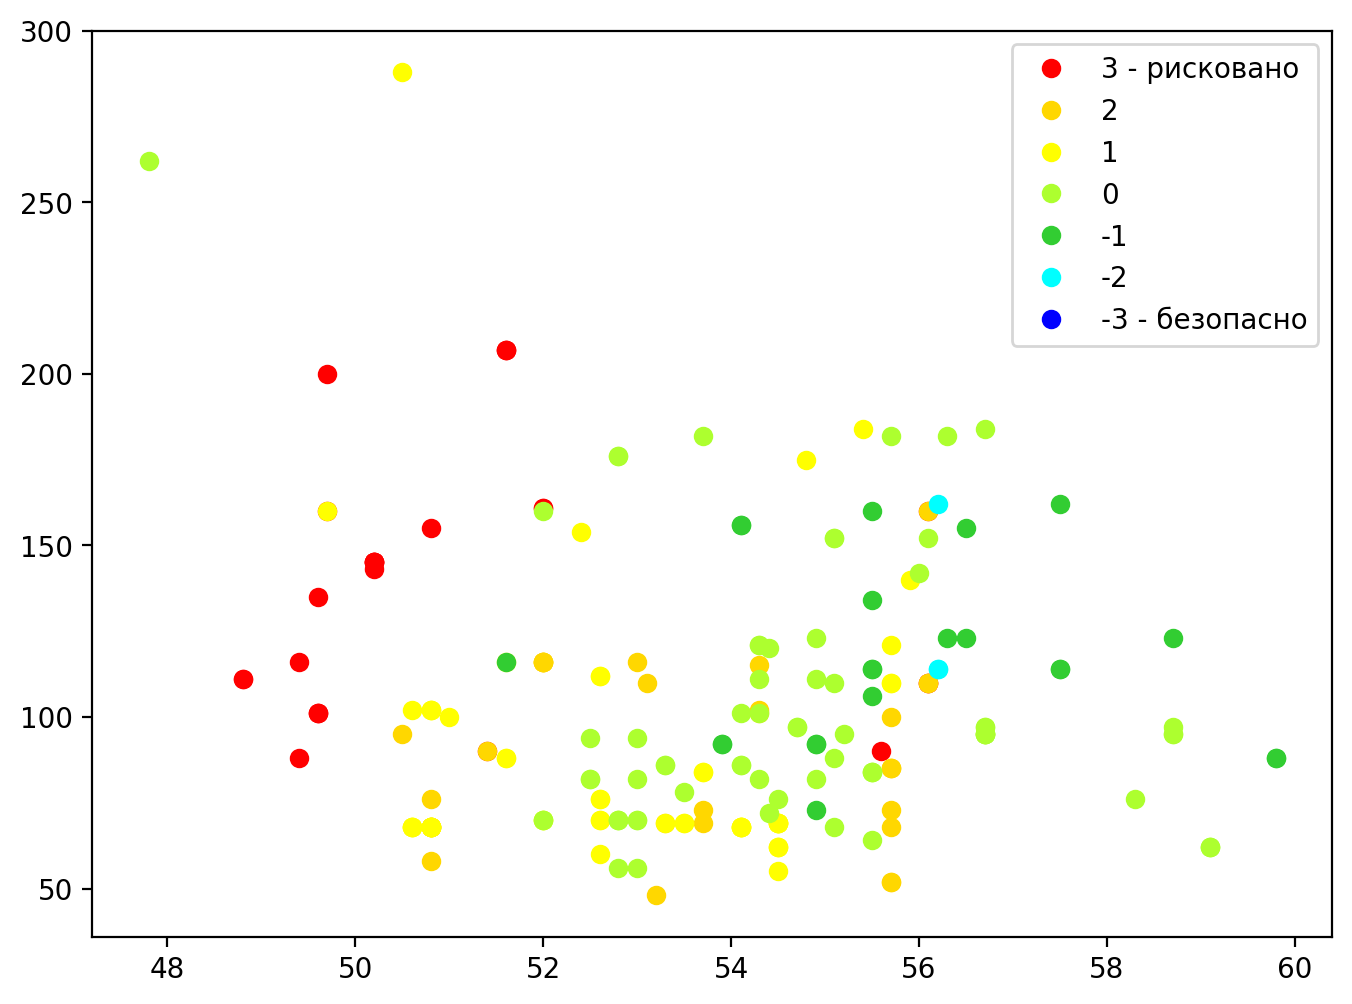

In [14]:
import matplotlib.pyplot as plt

plt.figure( figsize=(8, 6), dpi=200 )
plt.plot(pcad[target==3,0],pcad[target==3,1],"ro", label="3 - рисковано") 
plt.plot(pcad[target==2,0],pcad[target==2,1],"o", color='gold', label='2') 
plt.plot(pcad[target==1,0],pcad[target==1,1],"o", color='yellow', label='1')
plt.plot(pcad[target==0,0],pcad[target==0,1],"o", color='greenyellow', label='0')
plt.plot(pcad[target==-1,0],pcad[target==-1,1],"o", color='limegreen', label='-1')
plt.plot(pcad[target==-2,0],pcad[target==-2,1],"o", color='cyan', label='-2') 
plt.plot(pcad[target==-3,0],pcad[target==-3,1],"o", color='blue', label="-3 - безопасно")
plt.legend();

+ Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр n_components), для которой доля объясняемой дисперсии будет не менее 99%.

In [15]:
from sklearn.decomposition import PCA 

for r in range(1,len(dfn.T)):
    pca = PCA( n_components = r )
    pca.fit( dfn.drop(['V0'],axis=1) )
    print( "r =",r,"\tДисперсия =", sum(pca.explained_variance_ratio_)*100,"%" )

r = 1 	Дисперсия = 99.49531828213095 %
r = 2 	Дисперсия = 99.87588351919075 %
r = 3 	Дисперсия = 99.99711235545065 %
r = 4 	Дисперсия = 99.9986143635172 %
r = 5 	Дисперсия = 99.9995973372597 %
r = 6 	Дисперсия = 99.99987549940394 %
r = 7 	Дисперсия = 99.99993605219689 %
r = 8 	Дисперсия = 99.99997396945635 %
r = 9 	Дисперсия = 99.99998455173208 %
r = 10 	Дисперсия = 99.99999309896651 %
r = 11 	Дисперсия = 99.999997105323 %
r = 12 	Дисперсия = 99.9999985814535 %
r = 13 	Дисперсия = 99.99999981430058 %
r = 14 	Дисперсия = 99.9999999470901 %
r = 15 	Дисперсия = 100.0 %


**Доля объясняемой дисперсии не менее 99% начиная сразу с `n_components = 1`.**

+ Пользуясь методом главных компонент, снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде точек на плоскости, отображая точки различных классов разными цветами.

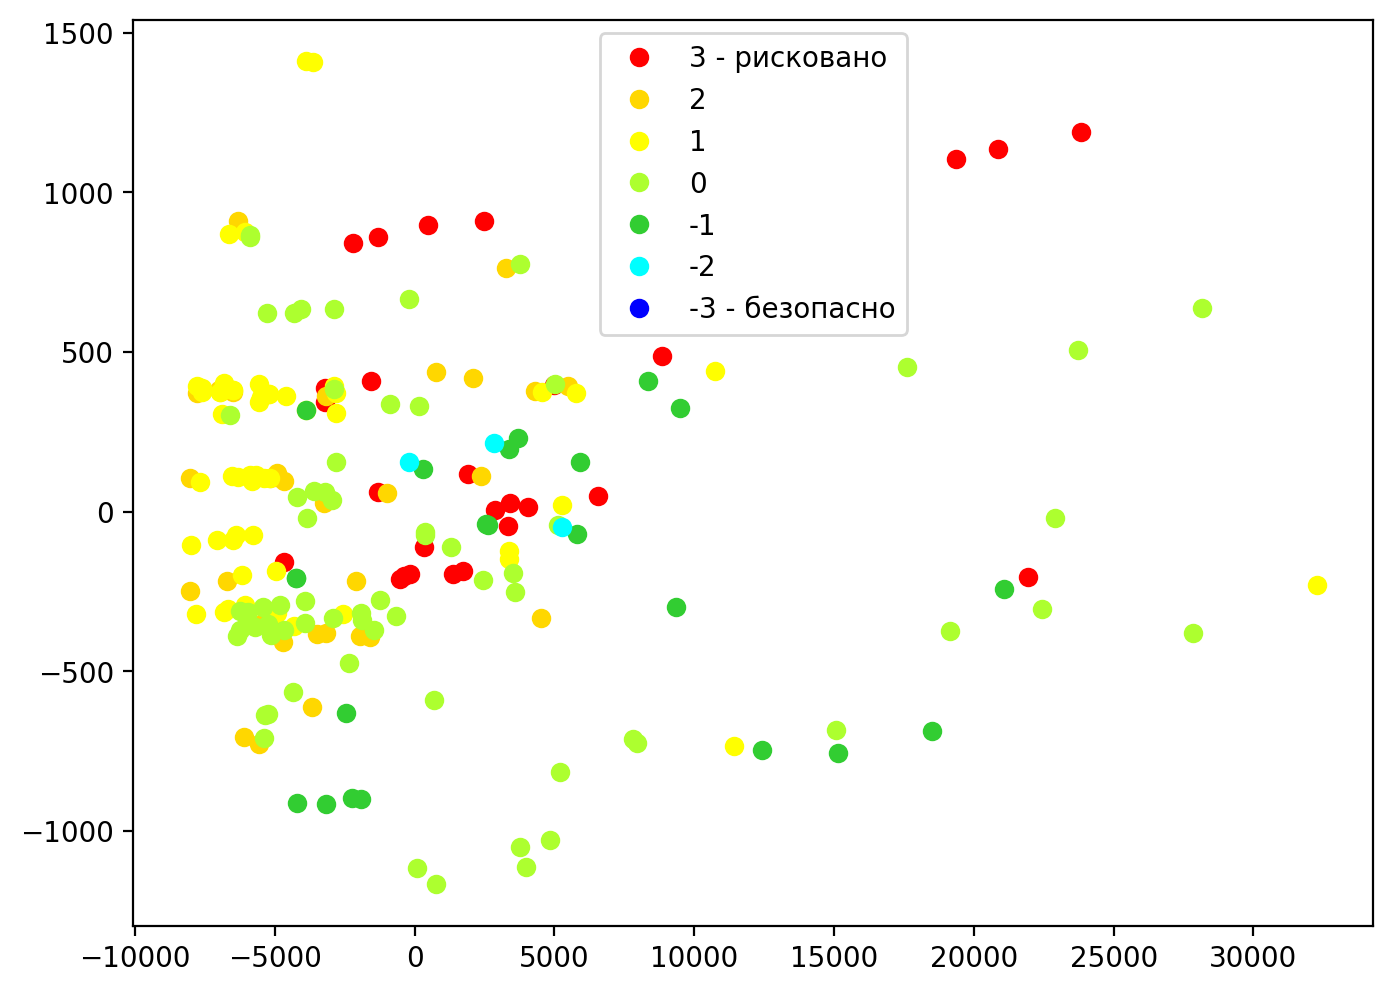

In [16]:
target = dfn['V0']

pca = PCA(n_components=2)
pcad = pca.fit_transform( dfn.drop(['V0'],axis=1) )

plt.figure( figsize=(8, 6), dpi=200 )
plt.plot(pcad[target==3,0],pcad[target==3,1],"ro", label="3 - рисковано") 
plt.plot(pcad[target==2,0],pcad[target==2,1],"o", color='gold', label='2') 
plt.plot(pcad[target==1,0],pcad[target==1,1],"o", color='yellow', label='1')
plt.plot(pcad[target==0,0],pcad[target==0,1],"o", color='greenyellow', label='0')
plt.plot(pcad[target==-1,0],pcad[target==-1,1],"o", color='limegreen', label='-1')
plt.plot(pcad[target==-2,0],pcad[target==-2,1],"o", color='cyan', label='-2') 
plt.plot(pcad[target==-3,0],pcad[target==-3,1],"o", color='blue', label="-3 - безопасно")
plt.legend();